<a href="https://colab.research.google.com/github/GaiaFL/Projet-Cassiopee/blob/main/Modelo1_Gabriel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!pip install tabula-py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Imports

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import ast
from sklearn.metrics import mean_squared_error
from math import sqrt
import math
import gdown
from tabula.io import read_pdf
import glob

# Load Dataset

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
! wget 'https://raw.githubusercontent.com/GaiaFL/Projet-Cassiopee/main/Database/Dataset%20-%20A0.csv'
! wget 'https://raw.githubusercontent.com/GaiaFL/Projet-Cassiopee/main/Database/Dataset%20-%20A1.csv'
! wget 'https://raw.githubusercontent.com/GaiaFL/Projet-Cassiopee/main/Database/Dataset%20-%20A2.csv'
! wget 'https://raw.githubusercontent.com/GaiaFL/Projet-Cassiopee/main/Database/Dataset%20-%20A3.csv'

! wget 'https://raw.githubusercontent.com/GaiaFL/Projet-Cassiopee/main/Database/Dataset%20-%20B0.csv'
! wget 'https://raw.githubusercontent.com/GaiaFL/Projet-Cassiopee/main/Database/Dataset%20-%20B1.csv'
! wget 'https://raw.githubusercontent.com/GaiaFL/Projet-Cassiopee/main/Database/Dataset%20-%20B2.csv'
! wget 'https://raw.githubusercontent.com/GaiaFL/Projet-Cassiopee/main/Database/Dataset%20-%20B3.csv'

! wget 'https://raw.githubusercontent.com/GaiaFL/Projet-Cassiopee/main/Database/Dataset%20-%20E0.csv'
! wget 'https://raw.githubusercontent.com/GaiaFL/Projet-Cassiopee/main/Database/Dataset%20-%20E1.csv'
! wget 'https://raw.githubusercontent.com/GaiaFL/Projet-Cassiopee/main/Database/Dataset%20-%20E2.csv'
! wget 'https://raw.githubusercontent.com/GaiaFL/Projet-Cassiopee/main/Database/Dataset%20-%20E3%20(2).csv'


--2023-06-10 23:44:48--  https://raw.githubusercontent.com/GaiaFL/Projet-Cassiopee/main/Database/Dataset%20-%20A0.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1718 (1.7K) [text/plain]
Saving to: ‘Dataset - A0.csv.3’

Dataset - A0.csv.3  100%[===================>]   1.68K  --.-KB/s    in 0s      

2023-06-10 23:44:48 (24.0 MB/s) - ‘Dataset - A0.csv.3’ saved [1718/1718]

--2023-06-10 23:44:48--  https://raw.githubusercontent.com/GaiaFL/Projet-Cassiopee/main/Database/Dataset%20-%20A1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK

#DataSet Gabriel 

In [58]:
df_A0 = pd.read_csv('Dataset - A0.csv')
df_A1 = pd.read_csv('Dataset - A1.csv')
df_A2 = pd.read_csv('Dataset - A2.csv')
df_A3 = pd.read_csv('Dataset - A3.csv')

df_B0 = pd.read_csv('Dataset - B0.csv')
df_B1 = pd.read_csv('Dataset - B1.csv')
df_B2 = pd.read_csv('Dataset - B2.csv')
df_B3 = pd.read_csv('Dataset - B3.csv')


df_E0 = pd.read_csv('Dataset - E0.csv')
df_E1 = pd.read_csv('Dataset - E1.csv')
df_E2 = pd.read_csv('Dataset - E2.csv')
df_E3 = pd.read_csv('Dataset - E3 (2).csv')


Inserting the places into the data sets

In [59]:
df_A0['place'] = 'A0'
df_A1['place'] = 'A1'
df_A2['place'] = 'A2'
df_A3['place'] = 'A3'

df_B0['place'] = 'B0'
df_B1['place'] = 'B1'
df_B2['place'] = 'B2'
df_B3['place'] = 'B3'

df_E0['place'] = 'E0'
df_E1['place'] = 'E1'
df_E2['place'] = 'E2'
df_E3['place'] = 'E3'



In [60]:
df_A0['coord'] = '[48.6246723,  2.4425536]'
df_A1['coord'] = '[48.6246723,  2.4425536]'
df_A2['coord'] = '[48.6246723,  2.4425536]'
df_A3['coord'] = '[48.6246723,  2.4425536]'

df_B0['coord'] = '[48.6245008, 2.442969]'
df_B1['coord'] = '[48.6245008, 2.442969]'
df_B2['coord'] = '[48.6245008, 2.442969]'
df_B3['coord'] = '[48.6245008, 2.442969]'

df_E0['coord'] = '[48.6246723,  2.4425536]'
df_E1['coord'] = '[48.6246723,  2.4425536]'
df_E2['coord'] = '[48.6246723,  2.4425536]'
df_E3['coord'] = '[48.6246723,  2.4425536]'

In [61]:
data = pd.concat([df_A0, df_A1, df_A2, df_A3, df_B0, df_B1, df_B2, df_B3, df_E0, df_E1, df_E2, df_E3])
#data['max_rssi'] = data['max_rssi'].astype(int)
#data['rssi'] = data['rssi'].astype(int)
data['delta'] = data['Max RSSI'] - data['RSSI']
data

,Status,SSID,RSSI,MAC Address,Max RSSI,place,coord,delta
0,Available,eduroam,-82,04-DA-D2-90-09-61,-82,A0,"[48.6246723, 2.4425536]",0
1,Available,SDN_SCADA,-85,B8-27-EB-20-A7-65,-85,A0,"[48.6246723, 2.4425536]",0
2,Available,eduroam,-70,CC-16-7E-13-20-81,-67,A0,"[48.6246723, 2.4425536]",3
3,Available,eduroam,-78,04-DA-D2-AA-5B-81,-74,A0,"[48.6246723, 2.4425536]",4
4,Available,eduroam,-79,04-DA-D2-AA-5B-8E,-77,A0,"[48.6246723, 2.4425536]",2
...,...,...,...,...,...,...,...,...
27,Available,eduroam,-85,50-06-04-5B-1C-61,-84,E3,"[48.6246723, 2.4425536]",1
28,Available,eduroam,-68,20-BB-C0-4B-9F-81,-66,E3,"[48.6246723, 2.4425536]",2
29,Available,eduroam,-65,20-BB-C0-4B-9F-8E,-63,E3,"[48.6246723, 2.4425536]",2
30,Available,eduroam,-48,20-BB-C0-4B-97-B1,-41,E3,"[48.6246723, 2.4425536]",7


In [62]:
data.csv = data.to_csv(path_or_buf="/content/drive/MyDrive/Prediction/data.csv")

In [70]:
rssi_values = []
place = ['A0', 'A1', 'A2', 'A3','E0', 'E1', 'E2', 'E3', 'B0', 'B1', 'B2', 'B3']

for x in place:
  prev = data.loc[data['place'] == x]
  #connect = prev[prev['status'] == 'Connected']
  prev = prev.sort_values(by='delta', ascending=False)
  #rssi_values.append(pd.concat([connect['rssi'].astype(int), prev['rssi'].astype(int)]).values)
  rssi_values.append(prev['RSSI'].astype(int).values)
x = np.array(rssi_values)
#y = places

<ipython-input-70-82bed6eeb135>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array(rssi_values)


#Third Dataset

In [ ]:
df = read_pdf("/content/drive/MyDrive/Prediction/Database_3.pdf", pages="all")

In [ ]:
places = ['A0', 'A1', 'A2', 'A3', 'E_U', 'E0', 'E1', 'E2', 'E3', 'E4', 'B0', 'B1', 'B2', 'B3']

for x in range(len(df)):
  #df[x].loc[len(df[x])] = df[x].columns
  if x == 9:
    df[x] = df[x].drop(df[x].index[[1,2]])
  df[x]['place'] = places[x]
  df[x] = df[x].set_axis(["status", "net", "rssi", "mac", "max_rssi", 'coordinates', 'place'], axis=1)
  df[x]['coordinates'] = df[x]['coordinates'].apply(ast.literal_eval).apply(pd.to_numeric)


In [ ]:
data = pd.concat([df[0], df[1], df[2], df[3], df[4], df[5], df[6], df[7], df[8], df[9], df[10], df[11], df[12], df[13]])
data['max_rssi'] = data['max_rssi'].astype(int)
data['rssi'] = data['rssi'].astype(int)
data['delta'] = data.apply(lambda y: y['max_rssi'] - y['rssi'], axis=1)
print(data)

       status      net  rssi                mac  max_rssi  \
0   Available  eduroam   -80  CC-16-7E-13-20-81       -79   
1   Available  eduroam   -82  04-DA-D2-AA-5B-81       -82   
2   Available  eduroam   -78  04-DA-D2-AA-5B-8E       -77   
3   Available  eduroam   -74  20-BB-C0-4B-9E-C1       -66   
4   Available  eduroam   -83  20-BB-C0-4B-9E-CE       -80   
..        ...      ...   ...                ...       ...   
2   Available  eduroam   -82  50-06-04-66-8B-5E       -81   
3   Available  eduroam   -77  50-06-04-5B-1F-81       -76   
4   Available  eduroam   -80  50-06-04-5B-1F-8E       -80   
5   Connected  eduroam   -39  50-06-04-5B-1E-D1       -34   
6   Available  eduroam   -42  50-06-04-5B-1E-DE       -39   

                coordinates place  delta  
0   [48.6246723, 2.4425536]    A0      1  
1   [48.6246723, 2.4425536]    A0      0  
2   [48.6246723, 2.4425536]    A0      1  
3   [48.6246723, 2.4425536]    A0      8  
4   [48.6246723, 2.4425536]    A0      3  
..       

In [ ]:
rssi_values = []

for x in places:
  prev = data.loc[data['place'] == x]
  #connect = prev[prev['status'] == 'Connected']
  prev = prev.sort_values(by='delta', ascending=True)
  #rssi_values.append(pd.concat([connect['rssi'].astype(int), prev['rssi'].astype(int)]).values)
  rssi_values.append(prev['rssi'].astype(int).values)
x = np.array(rssi_values)
#y = places

<ipython-input-115-0e70104570e4>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array(rssi_values)


In [ ]:
cord = data["coordinates"].drop_duplicates()
y = [item for sublist in [zip(places, cord)] for item in sublist]
print(y)

[('A0', array([48.6246723,  2.4425536])), ('A1', array([48.6246723,  2.4425536])), ('A2', array([48.6246723,  2.4425536])), ('A3', array([48.6246723,  2.4425536])), ('E_U', array([48.6246723,  2.4425536])), ('E0', array([48.6246723,  2.4425536])), ('E1', array([48.6246723,  2.4425536])), ('E2', array([48.6246723,  2.4425536])), ('E3', array([48.6246723,  2.4425536])), ('E4', array([48.6246723,  2.4425536])), ('B0', array([48.6246723,  2.4425536])), ('B1', array([48.6246723,  2.4425536])), ('B2', array([48.6246723,  2.4425536])), ('B3', array([48.6246723,  2.4425536]))]


#Second Dataset

In [ ]:
df = read_pdf("/content/drive/MyDrive/Prediction/RSSI.pdf", pages="all")

In [ ]:
places = ['A0', 'A1', 'B0', 'B1', 'C0', 'C1', 'D0', 'D1', 'E0', 'E1']
for x in range(len(df)):
  #df[x].loc[len(df[x])] = df[x].columns
  df[x]['place'] = places[x]
  df[x] = df[x].set_axis(["status", "net", "rssi", "mac", "max_rssi", 'coordinates', 'place'], axis=1)
  #df[x]['coordinates'] = df[x]['coordinates'].apply(ast.literal_eval).apply(pd.to_numeric)
  print(df[x])

In [ ]:
data = pd.concat([df[0], df[1], df[2], df[3], df[4], df[5], df[6], df[7], df[8], df[9]])
data['max_rssi'] = data['max_rssi'].astype(int)
data['rssi'] = data['rssi'].astype(int)
data['delta'] = data.apply(lambda y: y['max_rssi'] - y['rssi'], axis=1)
print(data)

In [ ]:
rssi_values = []

for x in places:
  prev = data.loc[data['place'] == x]
  #connect = prev[prev['status'] == 'Connected']
  prev = prev.sort_values(by='delta', ascending=True)
  #rssi_values.append(pd.concat([connect['rssi'].astype(int), prev['rssi'].astype(int)]).values)
  rssi_values.append(prev['rssi'].astype(int).values)
x = np.array(rssi_values)
#y = places


<ipython-input-113-0e70104570e4>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array(rssi_values)


In [ ]:
cord = data["coordinates"].drop_duplicates().apply(ast.literal_eval).unique()
y = [item for sublist in [zip(places, cord)] for item in sublist]


#First Dataset

In [ ]:
url = 'https://docs.google.com/spreadsheets/d/1ko0Ly0EcOsKuEj-cCBOkM4CH2cfJKJeC/edit?usp=sharing'
file_id = url.split('/')[-2]

# URL de download do arquivo
download_url = f'https://drive.google.com/uc?id={file_id}'

# Caminho local para salvar o arquivo
output_path = '/content/drive/MyDrive/Prediction/Database.xlsx'

# Faz o download do arquivo do Google Drive
gdown.download(download_url, output_path, quiet=False)

# Lê o arquivo Excel com o pandas
data = pd.read_excel(output_path)

Downloading...
From: https://drive.google.com/uc?id=1ko0Ly0EcOsKuEj-cCBOkM4CH2cfJKJeC
To: /content/drive/MyDrive/Prediction/Database.xlsx
100%|██████████| 11.3k/11.3k [00:00<00:00, 12.0MB/s]


In [ ]:
#path='/content/drive/MyDrive/Prediction/Database.xlsx'
data = pd.read_excel(output_path)
data = data.drop(data.columns[[1, 2]], axis=1)
data.columns = ["Coordinates", "1", "2", "3", "Average", "MAC"]
data['Average'] = data['Average'].astype('float64') 
data[['Tag', 'Coordinates']] = data.pop('Coordinates').str.split('-', n=1, expand=True)
data['Coordinates'] = data['Coordinates'].apply(ast.literal_eval).apply(pd.to_numeric)
print(data)

<ipython-input-10-440d0c0f094f>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


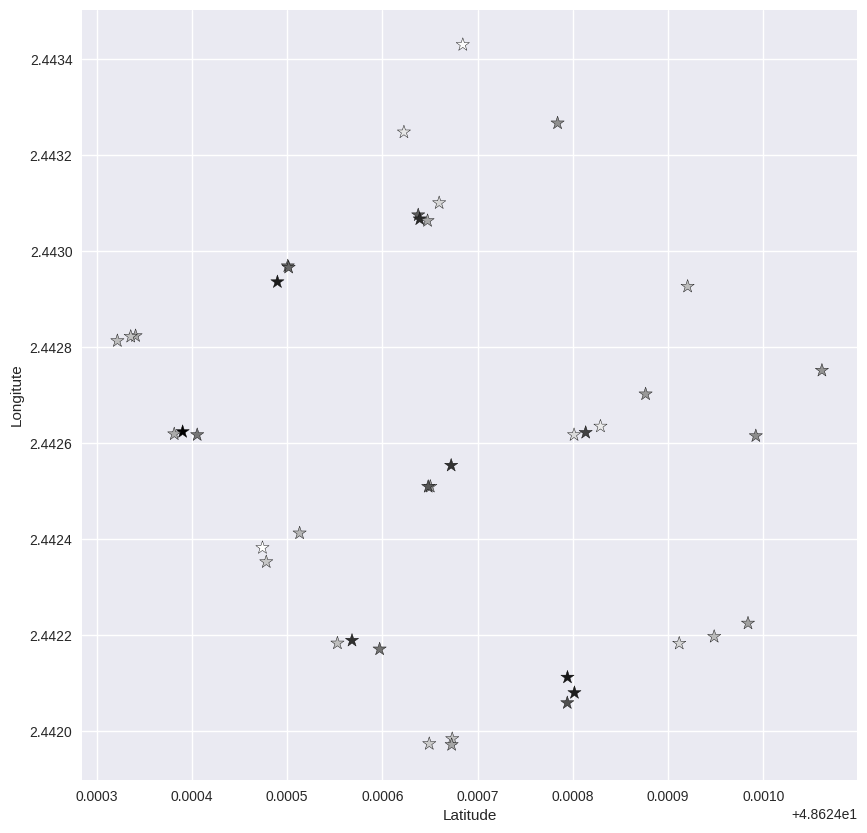

In [ ]:
#Each star represents a point in the map, and the darker the star, the higher the average RSSI captured
plt.style.use('seaborn')
plt.figure(figsize = (10,10))
plt.scatter(data['Coordinates'].str[0], data['Coordinates'].str[1], c = data['Average'], marker= '*',s=100,edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Longitute")
plt.show()

# Split Dataset

In [71]:
data.columns

Index(['Status', 'SSID', 'RSSI', 'MAC Address', 'Max RSSI', 'place', 'coord',
       'delta'],
      dtype='object')

In [72]:
x = data[['RSSI', 'Max RSSI', 'delta']].values
y = data['place']

X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state = 0)

#KNN Algorithm

In [73]:
class KnnLocalizer:

    """ KNN Regression Class for indoor localization using a 3-dimensional label space
        e.g.  Longitude, Latitude, and Floor

    Attributes:
        features - training data features - Average RSSI
        labels -  training data labels - Coordinates
        k (int) number of nearest neighbors

    """

    def __init__(self, features, labels, k=3):

        self.features = np.array(features)
        self.labels = np.array(labels)
        self.k = k

    @staticmethod
    def euclidean_distance(array1, array2): #Calculate the difference between each RSSI

        """ Euclidean distance function without squareroot taken for efficiency
		Args:
			Two arrays of equal length

		Returns:
			Distance squared between RSSI1 and RSSI2
		"""
        print(array1) #wifi fingerprint
        print(array2) #dataset
        distance = np.sum((array1-array2)**2)
        distance = math.sqrt(distance)  
        return distance
    
    @staticmethod
    def timsort(array, element):

        """ Sort method based on Python's sort() function that sorts tuples in descending order

        Args:
            array (array or list of tuples) array of tuples containing distance and label
            element (Int) the index of the element within tuple that is used to sort tuples

        Returns:
            Array of tuples sorted in descending order at index given by element
        """

        array.sort(key=lambda tup: tup[element])
        return array


    def knn_regression(self, instance):

        """ KNN regression function modified to return regression predictions
         of 3-dimensional labelspace: (RSSI, logitude, latitude).

        Args:
            Test_features (array) test RSSI for which to predict location

        Returns:
            An array containing the top 3 predicted coordinates
        """
        size_input = len(instance)
        temp_results = []
        for i in range(len(self.features)):
            
            RSSI = self.euclidean_distance(instance, self.features[i][:size_input])
            temp_results.append((self.labels[i], RSSI)) #each localisation with the difference of RSSI   
        sorted_distances = self.timsort(temp_results, 1)
        return sorted_distances[:3] #return the 3 localisation with minimum RSSI 

    def fit_predict(self, test_data):

        """ KNN Localizer prediction function

        Args:
        	test_data (array) test RSSI

        Returns:
        	List of arrays containing coordinate predictions
        """

        predictions = []
        for sample in test_data:
            predictions.append(self.knn_regression(sample))
        return predictions

In [74]:
MAX_CHARS = 128
def get_mean_point(points, debug=False):
  # Inicializar variável de retorno
  mean_point = [0,0]

  try:
    if len(points) > 0:
      # Calcular o ponto médio do conjunto
      for point in points:
        mean_point[0] += point[0]
        mean_point[1] += point[1]
      mean_point = [mean_point[0]/len(points), mean_point[1]/len(points)]

  except:
    print('[get_mean_point] ERROR: points [' + str(len(points)) + '] = ' + str(points)[:MAX_CHARS])
  finally:
    if debug:
      print('[get_mean_point] debug: mean_point = ' + str(mean_point))

  return mean_point

In [75]:
localizer = KnnLocalizer(x, y, 1)
new_predictions = localizer.fit_predict(np.array([[-71, -92, -46, -89]]))
print(new_predictions[0][0][0][0])
map = [i[0][1] for i in new_predictions[0]]
print([i[0][0] for i in new_predictions[0]])
pl_x = [i[0][1][0] for i in new_predictions[0]]
#print(pl_x)
pl_y = [i[0][1][1] for i in new_predictions[0]]
#print(pl_y)
mean = get_mean_point(map)
#print(mean)

[-71 -92 -46 -89]
[-82 -82   0]


ValueError: ignored

<ipython-input-85-1f716a34974b>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


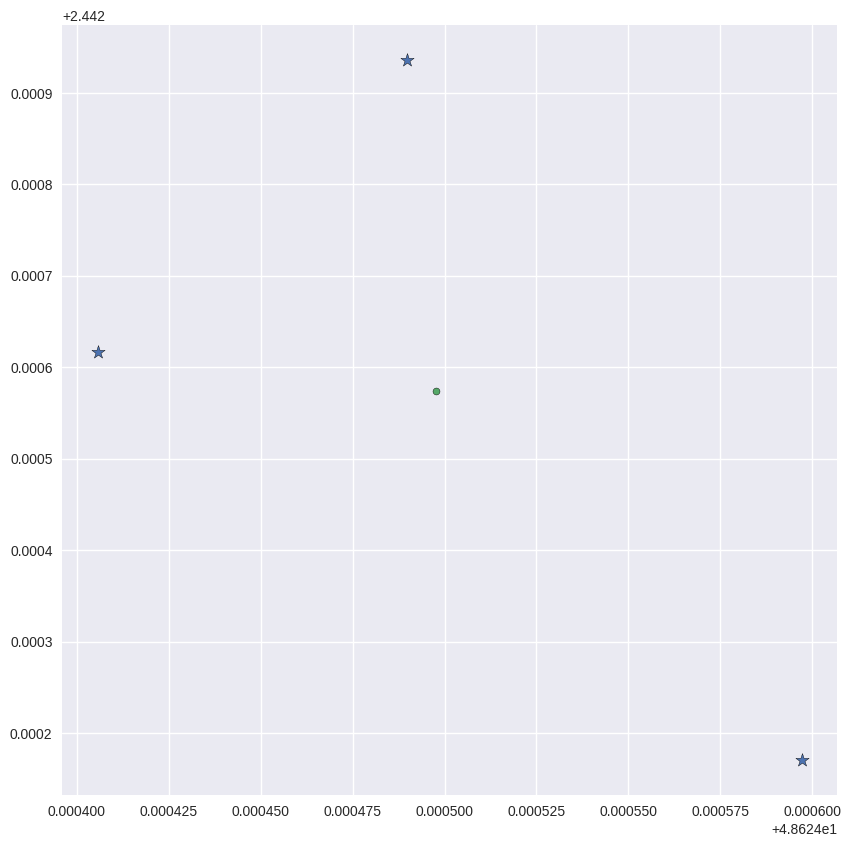

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize = (10,10))
plt.scatter(pl_x, pl_y, marker= '*',s=100,edgecolors='black')
plt.scatter(mean[0], mean[1], marker= '.',s=100,edgecolors='black')

In [ ]:
distances = []
for x in map:
  distances.append(localizer.euclidean_distance(np.array(mean), np.array(x)))

min_pos = distances.index(min(distances))
pos = new_predictions[0][min_pos]
print(pos[0][0])



[48.6246723  2.4425536]
[48.6246723  2.4425536]
[48.6246723  2.4425536]
[48.6246723  2.4425536]
[48.6246723  2.4425536]
[48.6246723  2.4425536]
E1


# Comparison of Results

In [ ]:
#Needs to compare the predictions with the test dataset
new_predictions = np.asarray(new_predictions)
print('Predictions made:\n', new_predictions)
print('Testing values\n', y_test)
n = len(y_test)

new_predictions_2 = np.split(new_predictions, n)
#print(new_predictions_2)

y_test_equalized = [arr.flatten() for arr in y_test]
print('Testing values equals\n',y_test_equalized)

new_predictions_equalized = [arr.flatten() for arr in new_predictions]
print('Predictions made equals:\n',new_predictions_equalized)

mse2 = mean_squared_error(y_test_equalized, new_predictions_2)
print('MSE:\n', mse2)
 #Gives error, improves it pls

In [ ]:

#Needs to compare the predictions with the test dataset
new_predictions = np.asarray(new_predictions)

y_test_div = np.concatenate(y_test)
new_predictions_div = np.concatenate(new_predictions)

print(new_predictions_div)
print(y_test_div)

mse = mean_squared_error(y_test_div, new_predictions_div)
print(mse) 

 #I tried to concatenate the two arrays but I don't think the result is sufficient

In [ ]:
2.711674309998789e-07
